# Two-sample equivalence test

To perform two-sample equivalence test,
we'll use the same procedure as Welch's two-sample $t$-test,
but this time prove that two unknown population $X \sim \mathcal{N}(\mu_X, \sigma_X)$ and $Y \sim \mathcal{N}(\mu_Y, \sigma_Y)$
are not different.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

$\def\stderr#1{\mathbf{se}_{#1}}$
$\def\stderrhat#1{\hat{\mathbf{se}}_{#1}}$
$\newcommand{\Mean}{\textbf{Mean}}$
$\newcommand{\Var}{\textbf{Var}}$
$\newcommand{\Std}{\textbf{Std}}$
$\newcommand{\Freq}{\textbf{Freq}}$
$\newcommand{\RelFreq}{\textbf{RelFreq}}$
$\newcommand{\DMeans}{\textbf{DMeans}}$
$\newcommand{\Prop}{\textbf{Prop}}$
$\newcommand{\DProps}{\textbf{DProps}}$

## Data
Two samples of numerical observations $\mathbf{x}=[x_1, x_2, \ldots, x_n]$
and $\mathbf{y}=[y_1, y_2,\ldots, y_m]$ from independent populations.

## Modeling assumptions

We assume the unknown populations are normally distributed $\textbf{(NORM)}$,
or the sample is large enough $\textbf{(LARGEn)}$.

## Hypotheses

$H_0: |\mu_X - \mu_Y| \geq \Delta_{\text{min}}$
versus $H_A: |\mu_X - \mu_Y| < \Delta_{\text{min}}$.

![equiv_test_hypotheses.png](./attachments/equiv_test_hypotheses.png)

## Statistical design

for $n=5$ ...


for $n=20$ ...


In [3]:
sesoi = 4

## Estimates

Compute the sample means
$\overline{\mathbf{x}} = \Mean(\mathbf{x})$,
$\overline{\mathbf{y}} = \Mean(\mathbf{y})$,
and the difference between means
$\hat{d} = \DMeans(\mathbf{x}, \mathbf{y}) = \overline{\mathbf{x}} - \overline{\mathbf{y}}$.

## Formulas
The estimated standard error of the difference between means estimator is

$$
  \stderrhat{\hat{d}}
        \; = \; \sqrt{  \stderrhat{\overline{\mathbf{x}}}^2 + \stderrhat{\overline{\mathbf{y}}}^2 }
        = \sqrt{ \tfrac{s_{\mathbf{x}}^2}{n} + \tfrac{s_{\mathbf{y}}^2}{m} },
$$

where $s_{\mathbf{x}}$ and $s_{\mathbf{y}}$ are the sample standard deviations.

## Test statistic

Compute the $t$-statistic $t = \frac{\hat{d} - 0}{ \stderrhat{\hat{d}} }$.

## Sampling distribution

Student's $t$-distribution with $\nu_d$ degrees of freedom,
where the degrees of freedom parameter is computed using
the helper function `calcdf`:
$\nu_d = \tt{calcdf}(s_{\mathbf{x}}, n, s_{\mathbf{y}}, m)$,
which implements the Welch--Satterthwaite formula.

## P-value calculation

In [4]:
# from stats_helpers import tost_dmeans

# %psource tost_dmeans

To perform the two-sample $t$-test on the samples `xs` and `ys`,
we call `tost_dmeans(xs, ys)`.

## Examples

For all the examples we present below,
we assume the unknown distribution are normally distributed 

$$
    \texttt{rvX} = X \sim \mathcal{N}(\mu_X,\sigma_X)
    \qquad
    \text{and}
    \qquad
    \texttt{rvY} = Y \sim \mathcal{N}(\mu_Y,\sigma_Y).
$$


In [5]:
from scipy.stats import norm

### Example A: populations are different

Suppose the $X$-population is normally distributed 
with mean $\mu_{X}=104$
and standard deviation $\sigma_{X} = 3$,
while the $Y$-population is normally distributed 
with mean $\mu_{X}=100$
and standard deviation $\sigma_{X} = 5$

$$
    \texttt{rvX} = X \sim \mathcal{N}(104,3)
    \qquad
    \text{and}
    \qquad
    \texttt{rvY} = Y \sim \mathcal{N}(100,5).
$$

In [6]:
muXA = 104
sigmaXA = 3
rvXA = norm(muXA, sigmaXA)

muYA = 100
sigmaYA = 5
rvYA = norm(muYA, sigmaYA)

Let's generate a sample `xAs` and `yAs` of size $n=20$ from the random variables $X = \texttt{rvXA}$ and $Y = \texttt{rvYA}$.

In [7]:
np.random.seed(42)

# generate a random sample of size n=20 from rvX
n = 20
xAs = rvXA.rvs(n)

# generate a random sample of size m=20 from rvY
m = 20
yAs = rvYA.rvs(m)
xAs, yAs

(array([105.49014246, 103.5852071 , 105.94306561, 108.56908957,
        103.29753988, 103.29758913, 108.73763845, 106.30230419,
        102.59157684, 105.62768013, 102.60974692, 102.60281074,
        104.72588681,  98.26015927,  98.8252465 , 102.31313741,
        100.96150664, 104.942742  , 101.27592777,  99.7630889 ]),
 array([107.32824384,  98.8711185 , 100.33764102,  92.87625907,
         97.27808638, 100.55461295,  94.24503211, 101.87849009,
         96.99680655,  98.54153125,  96.99146694, 109.26139092,
         99.93251388,  94.71144536, 104.11272456,  93.89578175,
        101.04431798,  90.20164938,  93.35906976, 100.98430618]))

In [8]:
dhatA = np.mean(xAs) - np.mean(yAs)
dhatA

4.815979892644748

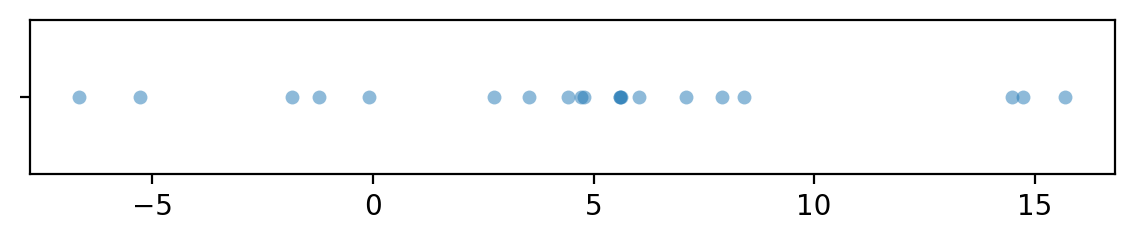

In [9]:
dAs = xAs - yAs
with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=dAs, jitter=0, alpha=0.5)

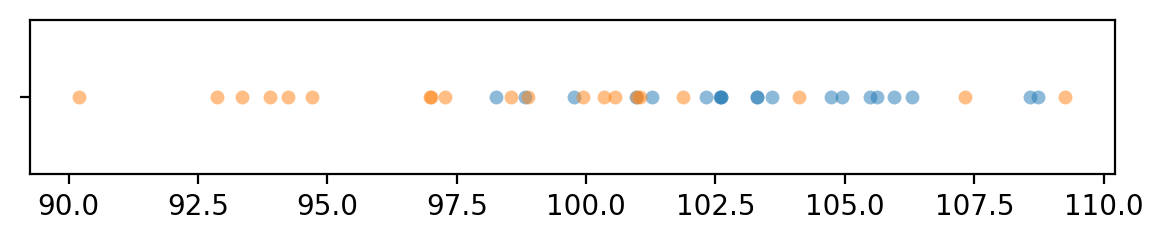

In [10]:
import seaborn as sns

with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=xAs, jitter=0, alpha=0.5)
    sns.stripplot(x=yAs, jitter=0, alpha=0.5)

To obtain the $p$-value,
we first compute the observed $t$-statistic,
then calculate the tail probabilities in the two tails of the standard normal distribution $T_0 \sim \mathcal{T}(\nu_d)$.

In [11]:
from scipy.stats import t as tdist
from stats_helpers import calcdf

# Calculate the sample statistics
from stats_helpers import mean, std
obsdhat = mean(xAs) - mean(yAs)
sx, sy = std(xAs), std(yAs)

# Calculate the standard error and the t-statistic
seD = np.sqrt(sx**2/n + sy**2/m)

# Calculate the degrees of freedom
dfD = calcdf(sx, n, sy, m)

# Positive hypothesis test
obstplus = (obsdhat - sesoi) / seD
rvT0plus = tdist(df=dfD)
pvalueplus = rvT0plus.cdf(obstplus)
print("obst+", obstplus, "  pvalue+", pvalueplus)

# Negative hypothesis test
obstminus = (obsdhat - (-sesoi)) / seD
rvT0minus = tdist(df=dfD)
pvalueminus = 1 - rvT0minus.cdf(obstminus)
print("obst-", obstminus, "   pvalue-", pvalueminus)

# the p-value is the largest of the two subtests
pvalue = max(pvalueplus, pvalueminus)
pvalue

obst+ 0.6479055169799628   pvalue+ 0.7390885154632982
obst- 7.000076915517506    pvalue- 3.7301428501557155e-08


0.7390885154632982

The helper function `ttost_ind` in the `statsmodels` module performs
exactly the same sequence of steps to compute the $p$-value.

In [12]:
from statsmodels.stats.weightstats import ttost_ind

ttost_ind(xAs, yAs, low=-sesoi, upp=sesoi, usevar='unequal')

(0.7390885154633053,
 (7.000076915517528, 3.730142848917544e-08, 30.95572939468825),
 (0.6479055169799854, 0.7390885154633053, 30.95572939468825))

The $p$-value we obtain is 0.739,
which is above the cutoff value $\alpha=0.05$,
so our conclusion is **we fail to reject the null hypothesis**:
the means of the two unknown populations differ significantly from the smallest effect size of interest $\Delta_{\text{min}}$.

### Example B: sample from a population as expected under $H_0$

In [13]:
muXB = 100
sigmaXB = 5
rvXB = norm(muXB, sigmaXB)

muYB = muXB
sigmaYB = sigmaXB
rvYB = norm(muYB, sigmaYB)

Let's generate a sample `xs` of size $n=20$ from the random variable $X = \texttt{rvX}$,
which has the same distribution as the theoretical distribution we expect under the null hypothesis.

In [14]:
np.random.seed(31)

# generate a random sample of size n=20 from rvX
n = 20
xBs = rvXB.rvs(n)

# generate a random sample of size m=20 from rvY
m = 20
yBs = rvYB.rvs(m)
# xBs, yBs
np.mean(xBs), np.mean(yBs)

(98.49345582110894, 99.90646412616485)

In [15]:
obsdhatB = np.mean(xBs) - np.mean(yBs)
obsdhatB

-1.4130083050559108

In [16]:
sxB, syB = std(xBs), std(yBs)
# Calculate the standard error and the t-statistic
seDB = np.sqrt(sxB**2/n + syB**2/m)
seDB

1.3075392073324235

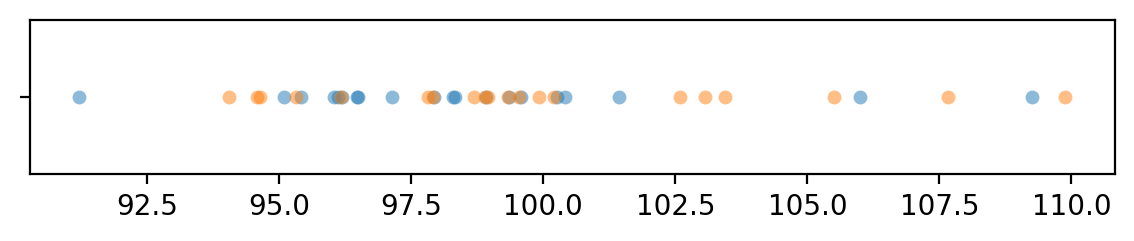

In [17]:
import seaborn as sns
with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(x=xBs, jitter=0, alpha=0.5)
    sns.stripplot(x=yBs, jitter=0, alpha=0.5)

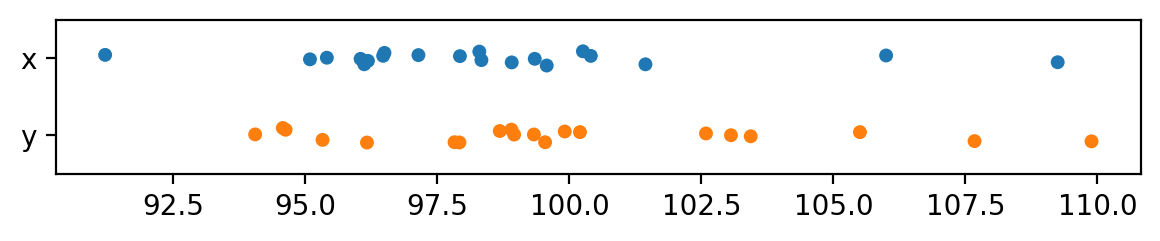

In [18]:
dfB = pd.DataFrame({"x": xBs, "y":yBs})
with plt.rc_context({"figure.figsize":(7,1)}):
    sns.stripplot(dfB, orient="h")

In [19]:
from scipy.stats import t as tdist
from stats_helpers import calcdf

# Calculate the sample statistics
from stats_helpers import mean, std
obsdhatB = mean(xBs) - mean(yBs)
print("obsdhatB =", obsdhatB)
sxB, syB = std(xBs), std(yBs)

# Calculate the standard error and the t-statistic
seDB = np.sqrt(sxB**2/n + syB**2/m)
print("seDB =", seDB, "  sesoi/seDB =", sesoi/seDB)

# Calculate the degrees of freedom
dfDB = calcdf(sxB, n, syB, m)
print("dfDB =", dfDB)

# Positive hypothesis test
obstplus = (obsdhatB - sesoi) / seDB
rvT0plus = tdist(df=dfDB)
pvalueplus = rvT0plus.cdf(obstplus)
print("obst+ =", obstplus, "  pvalue+ =", pvalueplus)

# Negative hypothesis test
obstminus = (obsdhatB - (-sesoi)) / seDB
rvT0minus = tdist(df=dfDB)
pvalueminus = 1 - rvT0minus.cdf(obstminus)
print("obst- =", obstminus, "   pvalue- =", pvalueminus)

# the p-value is the largest of the two sub-tests
pvalue = max(pvalueplus, pvalueminus)
pvalue

obsdhatB = -1.4130083050558824
seDB = 1.3075392073324235   sesoi/seDB = 3.0591816884486405
dfDB = 37.59083188299806
obst+ = -4.139843971561842   pvalue+ = 9.438014051414072e-05
obst- = 1.978519405335439    pvalue- = 0.02761615756744984


0.02761615756744984

In [20]:
from statsmodels.stats.weightstats import ttost_ind

ttost_ind(xBs, yBs, low=-sesoi, upp=sesoi, usevar='unequal')

(0.02761615756745112,
 (1.978519405335417, 0.02761615756745112, 37.59083188299806),
 (-4.139843971561863, 9.438014051413471e-05, 37.59083188299806))

The $p$-value we obtain is 0.0276, which is below the cutoff value $\alpha=0.05$
so our conclusion is that we've **reject the null hypothesis**:
this means of two samples are not significantly different.

## Confidence interval for the effect size

In [21]:
from stats_helpers import ci_dmeans

The confidence interval for the effect size $\Delta = \mu_X - \mu_Y$ in Example A is

In [22]:
ci_dmeans(xAs, yAs, alpha=0.1, method='a')

[2.6805293784320785, 6.951430406857417]

The confidence interval for the effect size $\Delta = \mu_X - \mu_Y$ in Example B is

In [23]:
ci_dmeans(xBs, yBs, alpha=0.1, method='a')

[-3.6180594963139185, 0.7920428862020961]

## Related



## Discussion

## Links

## Comprare with R

```R
> install.packages("TOSTER")
> library(TOSTER)
> tsum_TOST(m1 = 98.49345582110894, sd1 = 3.913169794238548, n1 = 20,
+           m2 = 99.90646412616485, sd2 = 4.345144155915784, n2 = 20,
+           eqb = 4, alpha = 0.05, var.equal = FALSE)

Welch Modified Two-Sample t-Test
The equivalence test was significant, t(37.59) = 1.979, p = 2.76e-02
The null hypothesis test was non-significant, t(37.59) = -1.081, p = 2.87e-01
NHST: do not reject null significance hypothesis that the effect is equal to zero 
TOST: reject null equivalence hypothesis

TOST Results 
                t    df p.value
t-test     -1.081 37.59   0.287
TOST Lower  1.979 37.59   0.028
TOST Upper -4.140 37.59 < 0.001

Effect Sizes 
               Estimate     SE              C.I. Conf. Level
Raw             -1.4130 1.3075  [-3.6181, 0.792]         0.9
Hedges g(av)    -0.3349 0.3412 [-0.8463, 0.1809]         0.9
```

# Simulation to check TOST sensitivity

Let's run a simulation to see how the accuracy of the TOST procedure
for detecting when two samples come from the same population.
We'll use the standard normal $Z \sim \mathcal{N}(0,1)$ as the population,
and run `ttost_ind` for different choices of `sesoi` and sample sizes `n=m`.

In [24]:
def one_equiv_test(mu, sigma, n, m, sesoi):
    """
    Run TOST on two samples from the same population.
    """
    # two identical populations
    muX, sigmaX = mu, sigma
    muY, sigmaY = mu, sigma
    rvX = norm(muX, sigmaX)
    rvY = norm(muY, sigmaY)

    # generate a random samples
    xs = rvX.rvs(n)
    ys = rvY.rvs(m)

    # run TOST
    p, _, _ = ttost_ind(xs, ys, low=-sesoi, upp=sesoi, usevar='unequal')
    return p


def replicate_many_equiv_tests(mu, sigma, n, m, sesoi, N=1000, cutoff=0.05):
    pvals = np.empty(N)
    for i in range(N):
        pval = one_equiv_test(mu=mu, sigma=sigma, n=n, m=m, sesoi=sesoi)
        pvals[i] = pval
    prop = sum(pvals < cutoff) / len(pvals)
    return prop



SIMULATE = False  # don't need to re-run simulation every time

if SIMULATE:
    np.random.seed(33)    
    sesois = np.arange(0.2, 1.5, 0.1)
    ns = [20, 30, 40, 60, 100]
    results = pd.DataFrame(columns=["sesoi", "n", "prop"])
    for i, (sesoi, n) in enumerate(product(sesois, ns)):
        print(f"{i} running replicate_many_equiv_tests for {sesoi=} and {n=}")
        prop = replicate_many_equiv_tests(mu=0, sigma=1, n=n, m=n, sesoi=sesoi)
        results.loc[i] = [sesoi, n, prop]
else:
    results = pd.DataFrame.from_records(
        [  (0.2,  20., 0.   ), (0.2,  30., 0.   ), (0.2,  40., 0.   ),
           (0.2,  60., 0.   ), (0.2, 100., 0.   ), (0.3,  20., 0.   ),
           (0.3,  30., 0.   ), (0.3,  40., 0.   ), (0.3,  60., 0.025),
           (0.3, 100., 0.384), (0.4,  20., 0.001), (0.4,  30., 0.012),
           (0.4,  40., 0.115), (0.4,  60., 0.411), (0.4, 100., 0.747),
           (0.5,  20., 0.035), (0.5,  30., 0.203), (0.5,  40., 0.412),
           (0.5,  60., 0.723), (0.5, 100., 0.932), (0.6,  20., 0.186),
           (0.6,  30., 0.497), (0.6,  40., 0.704), (0.6,  60., 0.898),
           (0.6, 100., 0.992), (0.7,  20., 0.395), (0.7,  30., 0.708),
           (0.7,  40., 0.865), (0.7,  60., 0.971), (0.7, 100., 0.996),
           (0.8,  20., 0.606), (0.8,  30., 0.862), (0.8,  40., 0.94 ),
           (0.8,  60., 0.993), (0.8, 100., 1.   ), (0.9,  20., 0.761),
           (0.9,  30., 0.937), (0.9,  40., 0.975), (0.9,  60., 0.998),
           (0.9, 100., 1.   ), (1. ,  20., 0.853), (1. ,  30., 0.968),
           (1. ,  40., 0.998), (1. ,  60., 1.   ), (1. , 100., 1.   ),
           (1.1,  20., 0.927), (1.1,  30., 0.991), (1.1,  40., 0.999),
           (1.1,  60., 1.   ), (1.1, 100., 1.   ), (1.2,  20., 0.971),
           (1.2,  30., 0.998), (1.2,  40., 1.   ), (1.2,  60., 1.   ),
           (1.2, 100., 1.   ), (1.3,  20., 0.982), (1.3,  30., 0.999),
           (1.3,  40., 1.   ), (1.3,  60., 1.   ), (1.3, 100., 1.   ),
           (1.4,  20., 0.992), (1.4,  30., 1.   ), (1.4,  40., 1.   ),
           (1.4,  60., 1.   ), (1.4, 100., 1.   ) ],
        columns=["sesoi", "n", "prop"]
    )

## TOST sensitivity results

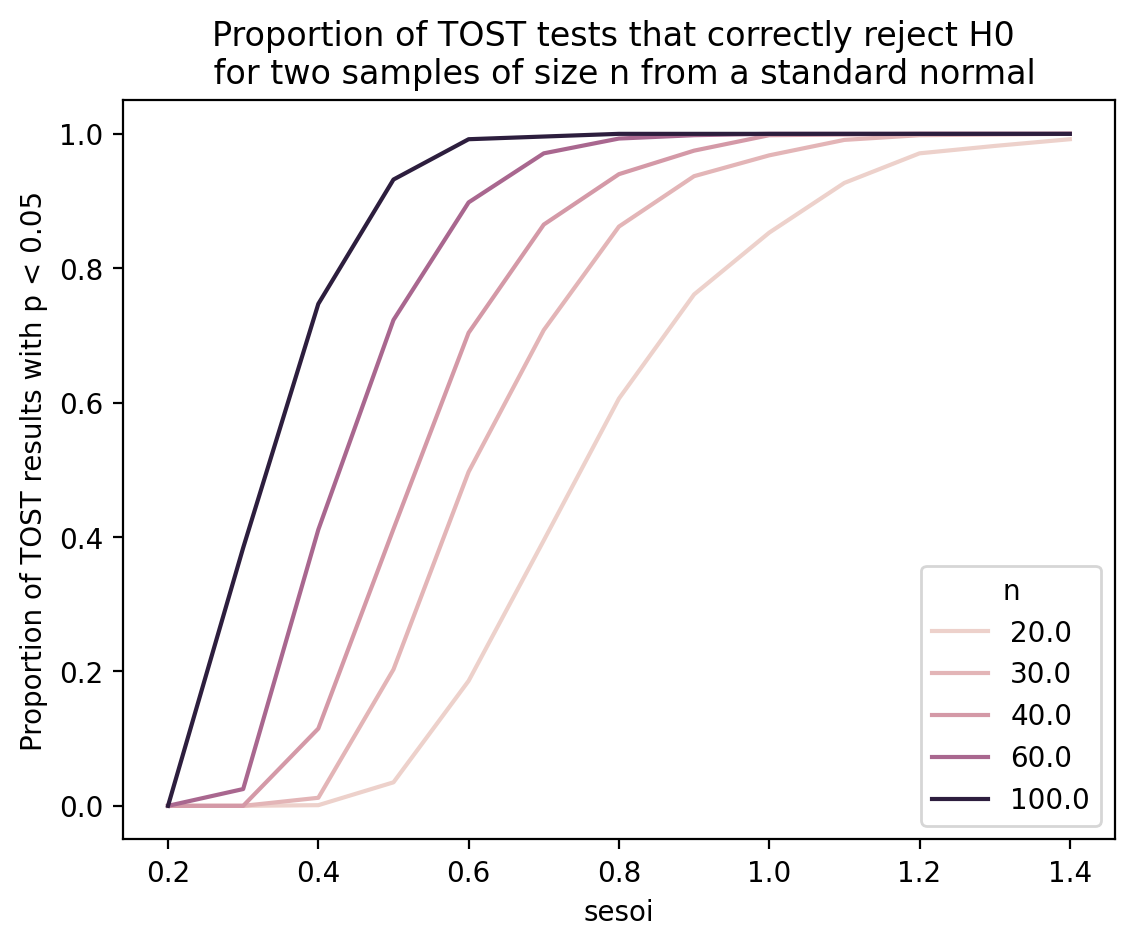

In [25]:
ax = sns.lineplot(x=results["sesoi"], y=results["prop"], hue=results["n"])
ax.set_title("Proportion of TOST tests that correctly reject H0 \n for two samples of size n from a standard normal")
ax.set_ylabel("Proportion of TOST results with p < 0.05");

The above graph shows that, for $n=30$ we need to use `sesoi` of around 0.7 standard deviations if we want TOST to have 80% power at detecting the equivalence.

For $n=20$ we need `sesoi` to be 1 standard deviation if we want 80% power.